<a href="https://colab.research.google.com/github/thmcheung/JSC270_HW2_2022_TingHoMarcusCheung/blob/main/part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PART 2

https://github.com/thmcheung/JSC270_HW2_2022_TingHoMarcusCheung


Libraries import

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import statsmodels.api as sm
import statsmodels.formula.api as smf
import requests

Importing data

In [80]:
income94 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
income94.columns = ['age','workclass', 'fnlwgt','education','education_num','marital_status','occupation',
                    'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','gross_income_group']

# Initial data exploration
Check the columns of the data

In [81]:
income94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 32561 non-null  int64 
 1   workclass           32561 non-null  object
 2   fnlwgt              32561 non-null  int64 
 3   education           32561 non-null  object
 4   education_num       32561 non-null  int64 
 5   marital_status      32561 non-null  object
 6   occupation          32561 non-null  object
 7   relationship        32561 non-null  object
 8   race                32561 non-null  object
 9   sex                 32561 non-null  object
 10  capital_gain        32561 non-null  int64 
 11  capital_loss        32561 non-null  int64 
 12  hours_per_week      32561 non-null  int64 
 13  native_country      32561 non-null  object
 14  gross_income_group  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


The data types based on their descriptions are correct, all the "continuous" data are int64 and the categorical data are object


Find representation of missing values

In [82]:
income94['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

As shown, there are 1836 missing values in the column 'workclass' and they are represented as ' ?'

Now, replace ' ?' with np.nan.

For real, why is there a space before the question mark?

Nan counts:

In [83]:
income94 = income94.replace(' ?', np.nan)
nan_counts = income94.isna().sum()
print(nan_counts)

age                      0
workclass             1836
fnlwgt                   0
education                0
education_num            0
marital_status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital_gain             0
capital_loss             0
hours_per_week           0
native_country         583
gross_income_group       0
dtype: int64


Plot capital_gains using histogram

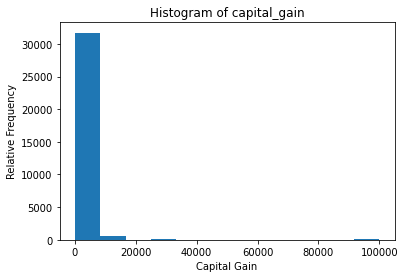

In [84]:
plt.hist(income94.capital_gain, bins = 12)
plt.title('Histogram of capital_gain')
plt.xlabel('Capital Gain')
plt.ylabel('Relative Frequency')
plt.show()

Plot capital_loss using histogram

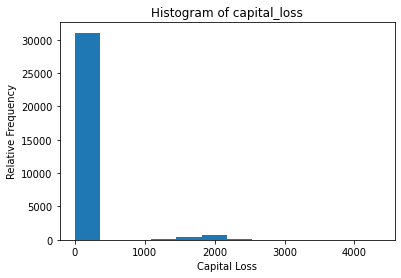

In [85]:
plt.hist(income94.capital_loss, bins = 12)
plt.title('Histogram of capital_loss')
plt.xlabel('Capital Loss')
plt.ylabel('Relative Frequency')
plt.show()

As shown the histograms, the majority of the samples in the dataframe have 0 capital_loss or capital_gains, so viewing them as a continuous numerical variable whilst doing linear regression not that useful. Therefore, I think they can be transformed into the categorical data has_capital_gain and has_capital_loss which will be True when the value of their corresponding cell is greater than 0 and False otherwise.

In [86]:
income94['has_capital_gain'] = np.where(income94['capital_gain'] > 0, True, False)
income94['has_capital_loss'] = np.where(income94['capital_loss'] > 0, True, False)
print(income94['has_capital_gain'].value_counts())
print(income94['has_capital_loss'].value_counts())

False    29849
True      2712
Name: has_capital_gain, dtype: int64
False    31042
True      1519
Name: has_capital_loss, dtype: int64


Explore the sampling weights in the dataset by plotting histogram and boxplot

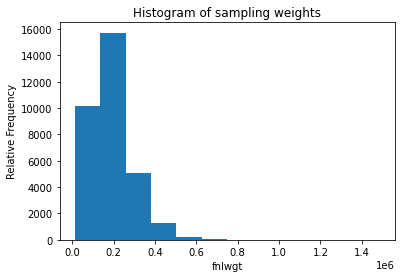

In [87]:
plt.hist(income94.fnlwgt, bins = 12)
plt.title('Histogram of sampling weights')
plt.xlabel('fnlwgt')
plt.ylabel('Relative Frequency')
plt.show()

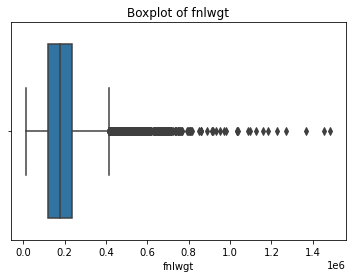

In [88]:
sns.boxplot(x = 'fnlwgt', data = income94)
plt.xlabel('fnlwgt')
plt.title('Boxplot of fnlwgt')
plt.show()

The graphs indicate that the variable fnlwgt is very right scewed and there are many outliers. Because of the large number of outliers, I don't think they should be removed.

Now, exploring the variable fnlwgt by the gender of the samples.

<ipython-input-89-bef171fafef7>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  grouped.boxplot(column='fnlwgt', by='sex', ax=ax)


 Female         AxesSubplot(0.1,0.15;0.363636x0.75)
 Male      AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

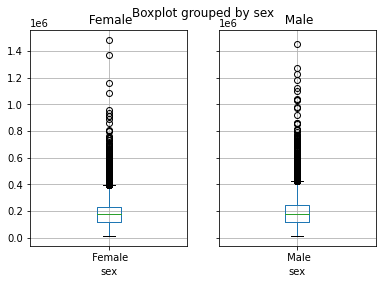

In [89]:
grouped = income94.groupby('sex')
fig, ax = plt.subplots()
grouped.boxplot(column='fnlwgt', by='sex', ax=ax)

As shown in the two boxplots, which are grouped by sex, the distribution is quite similar

# Correlation

Find correlation between age, education_num, and hours_per_week by drawing a correlation matrix

In [90]:
selected_columns = income94[['age', 'education_num', 'hours_per_week']]
corr_matrix = selected_columns.corr()
corr_matrix

,age,education_num,hours_per_week
age,1.000000,0.036527,0.068756
education_num,0.036527,1.000000,0.148123
hours_per_week,0.068756,0.148123,1.000000


It seems that none of the variables seem related because the highest correlation coefficient between all the variables are 0.148, which is between the variables hours per week and education num, and 0.148 indicates very weak positive correlation.

Perform Independent Samples T-Test on the variables education_num and hours_per_week

In [91]:
t_test_results = ttest_ind(income94['education_num'], income94['hours_per_week'])
print(t_test_results)

Ttest_indResult(statistic=-434.3097872965163, pvalue=0.0)


The sample T-test shows us that the means of the two groups are significantly different. This finding is expected because these two groups are merely related in any ways.

Now, find the correlation of the variables age and education_num of males and females then compare them.

In [92]:
grouped = income94.groupby('sex')
corr_by_group = grouped.apply(lambda x: np.corrcoef(x['age'], x['education_num'])[0, 1])
print(corr_by_group)

sex
 Female   -0.017899
 Male      0.060486
dtype: float64


After grouping them into males and females, I found that the correlation coefficient of the two groups of the variables age and education_num are still very low, which is expected. However, the correlation of these variables for the females is negative, which is somewhat unexpected but also expected since the correlation of the entire group was already very low, so for one of the groups to be negative isn't that surprising.

Covariance matrix for education_num and hours_per_week

In [98]:
selected_columns = income94[['education_num', 'hours_per_week']]
cov_matrix = selected_columns.cov()
print(cov_matrix)

                education_num  hours_per_week
education_num        6.618890        4.705338
hours_per_week       4.705338      152.458995


The covariance matrix shows that there is a positive relationship between the two variables, so as one variable increases, the other increases too. Furthermore, hours_per_week has a larger variance than the education_num (which is expected since the number of hours people work can vary a lot while education_num won't vary much)

# Regression
Fit a linear regression model with hours_per_week as the dependent variable and sex as the independent variable

In [94]:
reg1 = smf.ols('hours_per_week ~ sex', data = income94).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1807.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:53:04   Log-Likelihood:            -1.2716e+05
No. Observations:               32561   AIC:                         2.543e+05
Df Residuals:                   32559   BIC:                         2.543e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       36.4104      0.116    314.412   

According to this graph, the baseline (female) work an average 36.41 hours per week and the average male works an average 6 hours more, which means the average male works for 42.42 hours per week.

Add education_num as a control variable.

In [95]:
reg1 = smf.ols('hours_per_week ~ sex + education_num', data = income94).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1295.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:53:04   Log-Likelihood:            -1.2680e+05
No. Observations:               32561   AIC:                         2.536e+05
Df Residuals:                   32558   BIC:                         2.536e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        29.4106      0.281    104.556

The trend in hours worked by men and women remains the same since at the same level of education, the model suggests that the average male works 5.97 more hours than the baseline (female). The coefficient for education_num is statistically significant since the value of P > |t| is 0 in the education_num row. The 95% interval confidence interval for the baseline (female with 0 education_num) is [28.859, 29.962].

Now add gross_income_group as a binary variable.

In [96]:
reg1 = smf.ols('hours_per_week ~ sex + education_num + gross_income_group', data = income94).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:         hours_per_week   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     1130.
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:53:04   Log-Likelihood:            -1.2643e+05
No. Observations:               32561   AIC:                         2.529e+05
Df Residuals:                   32557   BIC:                         2.529e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

The statistic I used to decide which one is the best is R squared. The higher the R squared, the better the fit the regression model to the data. Therefore, I believe the best model is the third one, so the one with all sex, gross_income_group, and education_num. The second to best is the model with sex and education_num. The worst is the first model with only sex as the independent variable.